# Analyzing Airbnb data of Toronto in 2019

The purpose of this Noteboook is to do a descriptive analyzis of the airbnb ecosystem in Toronto. Additionally, we will try to generate a model that can predict the price per night of an airbnb.

all data obtained from: http://insideairbnb.com/toronto/

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
sns.set(rc={'figure.figsize':(10,8)})

In [60]:
data = pd.read_csv('AB_TO_2019.csv')

In [61]:
data.dtypes

id                               int64
name                            object
host_name                       object
host_is_superhost               object
host_listings_count            float64
neighbourhood                   object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
bed_type                        object
price                            int64
availability_365                 int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
dtype: object

In [10]:
data.head()

,id,name,host_name,host_is_superhost,host_listings_count,neighbourhood,latitude,longitude,property_type,room_type,...,bed_type,price,availability_365,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,1419,Beautiful home in amazing area!,Alexandra,f,1.0,Little Portugal,43.64617,-79.42451,House,Entire home/apt,...,Real Bed,470,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0
1,8077,Downtown Harbourfront Private Room,Kathie & Larry,f,2.0,Downtown Toronto,43.64105,-79.37628,Apartment,Private room,...,Real Bed,100,0,97.0,10.0,10.0,10.0,10.0,10.0,10.0
2,12604,Seaton Village Parlour Bedroom,Rona,f,1.0,The Annex,43.66724,-79.41598,House,Private room,...,Pull-out Sofa,67,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23691,Queen Bedroom close to downtown,Yohan & Sarah,t,2.0,Fairbank,43.69602,-79.45468,House,Private room,...,Real Bed,72,244,95.0,10.0,10.0,10.0,10.0,9.0,10.0
4,26654,"World Class downtown@ CN Tower! Jays, TIFF, ACC",Adela,f,7.0,Downtown Toronto,43.64530,-79.38940,Condominium,Entire home/apt,...,Real Bed,199,357,95.0,10.0,10.0,9.0,10.0,10.0,9.0


Text(0.5,1,'Distribution of Price (without Outliers)')

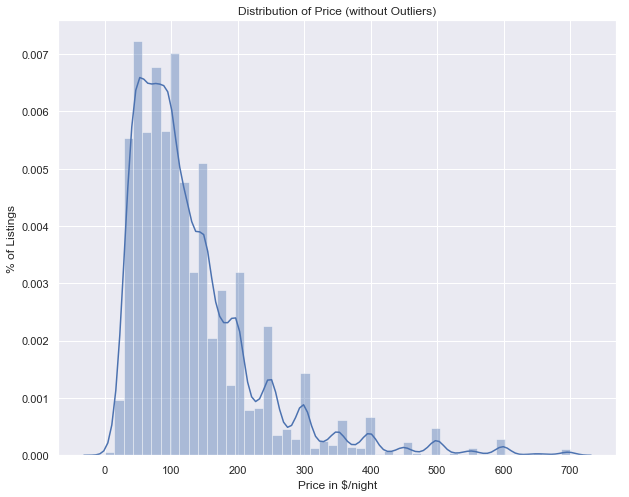

In [69]:
df_less_price1 = data.loc[data['price']<=700]
viz_0= sns.distplot(df_less_price1['price'])
viz_0.set_xlabel('Price in $/night')
viz_0.set_ylabel('% of Listings')
viz_0.set_title('Distribution of Price (without Outliers)')

In [21]:
outliers = 145.43+(3*234.58)
print(outliers)

849.1700000000001


In [6]:
data.describe() 

,id,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,availability_365,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,2.161700e+04,21612.000000,21617.000000,21617.000000,21617.000000,21606.000000,21609.000000,21598.000000,21617.000000,21617.000000,17553.000000,17544.000000,17545.000000,17543.000000,17546.000000,17539.000000,17541.000000
mean,2.264754e+07,5.495789,43.680015,-79.397738,3.188463,1.256619,1.337822,1.699556,145.439746,122.411343,94.267077,9.645178,9.414819,9.732486,9.751738,9.707566,9.454991
std,1.034099e+07,12.717081,0.048057,0.062342,2.067225,0.578182,0.887766,1.119217,234.584933,127.240381,8.249299,0.813380,0.978478,0.718961,0.723839,0.668820,0.886865
min,1.419000e+03,0.000000,43.586710,-79.632630,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,1.477344e+07,1.000000,43.645070,-79.424890,2.000000,1.000000,1.000000,1.000000,65.000000,1.000000,93.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000
50%,2.375776e+07,2.000000,43.662330,-79.397380,2.000000,1.000000,1.000000,1.000000,100.000000,75.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,3.168793e+07,4.000000,43.696940,-79.377510,4.000000,1.000000,2.000000,2.000000,169.000000,225.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,3.759121e+07,186.000000,43.831710,-79.127810,16.000000,11.500000,15.000000,16.000000,13304.000000,365.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [8]:
#find out how which columns have null values
data.isnull().sum()

id                                0
name                              2
host_name                         5
host_is_superhost                 5
host_listings_count               5
neighbourhood                     2
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                        11
bedrooms                          8
beds                             19
bed_type                          0
price                             0
availability_365                  0
review_scores_rating           4064
review_scores_accuracy         4073
review_scores_cleanliness      4072
review_scores_checkin          4074
review_scores_communication    4071
review_scores_location         4078
review_scores_value            4076
dtype: int64

as we can see all the review_scores_X columns have 4064 null values. It is tempting to set those valalues equal to 0, but I am afraid we would be skewing the data too much. Should we ignore such columns for the rest of our analysis? 

Nonetheless, for bathrooms,bedrooms,and beds I think it is okay to set them to 0. The user might no have wanted to specify this, as it might be on the name of the listing.

Now lets check the nature of our categorical values. This is important because often times when you have more than 10, their predictive and descriptive power decreases.

In [13]:
column_names = data.columns.values
column_names

array(['id', 'name', 'host_name', 'host_is_superhost',
       'host_listings_count', 'neighbourhood', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'price', 'availability_365',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'], dtype=object)

In [17]:
unique_neighbourhood = data.neighbourhood.unique()
unique_property_type = data.property_type.unique()
unique_room_type = data.room_type.unique()
print(unique_neighbourhood, unique_property_type,unique_room_type)
print(len(unique_neighbourhood), len(unique_property_type),len(unique_room_type))

['Little Portugal' 'Downtown Toronto' 'The Annex' 'Fairbank'
 'Greenwood-Coxwell' 'Harbourfront' 'Parkdale' 'Oakridge'
 'Wexford/Maryvale' 'Rosedale' 'Garden District' 'Niagara'
 'Dufferin Grove' 'Toronto Islands' 'Riverdale' 'High Park North'
 'Danforth Village' 'Forest Hill' 'Palmerston/Little Italy' 'Swansea'
 'Downsview' 'Scarborough City Centre' 'Cedarvale Humewood' 'The Beaches'
 'The Junction' 'Stonegate-Queensway' 'Dovercourt Park' 'Studio District'
 'Roncesvalles' 'Broadview North' 'South Hill/Rathnelly' 'Wallace Emerson'
 'Davisville' 'The Pocket' 'Entertainment District' 'Willowdale'
 'Fashion District' 'Kensington Market' 'The Danforth' 'Woodbine Corridor'
 'Amesbury' 'Wychwood Park' 'Parkwoods' 'Trinity-Bellwoods' 'Cliffside'
 'Pellam Park' 'Morningside' 'Humbermede' 'Saint Lawrence' 'Long Branch'
 'Henry Farm' 'Leaside' 'Ionview' 'Cabbagetown' 'Pleasant View' 'Mimico'
 'Westminster/Branson' 'Greek Town' 'Casa Loma' 'Flemingdon Park'
 'Don Mills' 'Oakwood' 'Scarborough Vil

There are 142 different neighbourhoods, 32 different types of porperty types, and 3 types of room type. Lets investigate which neighbourhoods and property types are the ones that we see the most in Toronto.

In [40]:
#lets only use the top 10 neigs with the most Listings
top_10_nb = data.neighbourhood.value_counts().head(10)
top_10_nb

Downtown Toronto           4966
Entertainment District     1216
Niagara                     959
Willowdale                  715
The Annex                   665
Trinity-Bellwoods           504
Parkdale                    472
Riverdale                   464
Roncesvalles                377
Palmerston/Little Italy     375
Name: neighbourhood, dtype: int64

[Text(0,0,'10'),
 Text(0,0,'20'),
 Text(0,0,'30'),
 Text(0,0,'40'),
 Text(0,0,'50'),
 Text(0,0,'60'),
 Text(0,0,'70'),
 Text(0,0,'80'),
 Text(0,0,'90')]

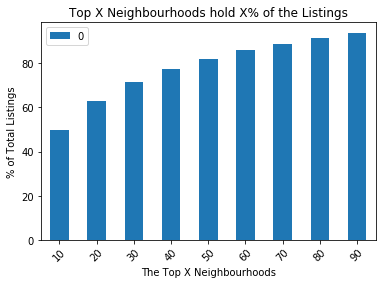

In [48]:
dict = {}
increment = 10
total_listings = len(data)
while(increment<100):
    sum_of_top_x = sum(data.neighbourhood.value_counts().head(increment).values.tolist())
    percent_contribution = (sum_of_top_x/total_listings)*100
    dict[increment]=percent_contribution
    increment+=10

df_percentages = pd.DataFrame.from_dict(dict, orient='index')


viz_1 = df_percentages.plot(kind = 'bar')
viz_1.set_title('Top X Neighbourhoods hold X% of the Listings')
viz_1.set_ylabel('% of Total Listings')
viz_1.set_xlabel('The Top X Neighbourhoods')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation = 45)
    

The top 45 neighbours account for 80% of the listings. And the Top 10 neighbours account for almost 50% of the listings. As I want the graphs not to be convoluted, I will continue the analysis only using the Top 10 neighbourhoods. 

In [65]:
total_listings = len(data)
sum_of_top_x = sum(data.property_type.value_counts().head(5).values.tolist())
percent_contribution = (sum_of_top_x/total_listings)*100
print(percent_contribution)

91.35402692325485


The Top 5 property types contribute to 91% of the listings!! Let's just use those top 5 for the rest of the analysis.

In [108]:
top_5_property_types = data.property_type.value_counts().head(5)
top_5_property_types

Apartment      6337
Condominium    5836
House          5729
Townhouse       991
Guest suite     855
Name: property_type, dtype: int64

Now, let's analyze the price distribution depending on the room type.

[Text(0,0,'Entire home/apt'),
 Text(0,0,'Private room'),
 Text(0,0,'Shared room')]

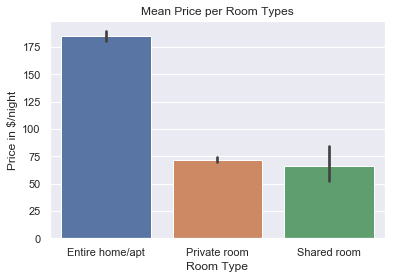

In [5]:
viz_3 = sns.barplot(x="room_type", y="price", data=data)
viz_3.set_title('Mean Price per Room Types')
viz_3.set_ylabel('Price in $/night')
viz_3.set_xlabel('Room Type')
viz_3.set_xticklabels(viz_3.get_xticklabels())



As we can see, Entire home/apt is the most common out of the three. Private room and shared room are almost the same.

It would be interesting to further investigate the price by seeing the distribution of price per neighbourhood.

But before we do that I want to remove some of the outliers in price, as this wouldn't allow us to have a good visualization of these. The mean in price is 145 and the max value is over 13k, therefore I would like to observe all listings with a price under 700.

I will still be using the top 10 neighbourhoods prior to reducing the size of the df to contain only those where the price is under 700.

[Text(0,0,'Downtown Toronto'),
 Text(0,0,'The Annex'),
 Text(0,0,'Parkdale'),
 Text(0,0,'Niagara'),
 Text(0,0,'Riverdale'),
 Text(0,0,'Palmerston/Little Italy'),
 Text(0,0,'Roncesvalles'),
 Text(0,0,'Entertainment District'),
 Text(0,0,'Willowdale'),
 Text(0,0,'Trinity-Bellwoods')]

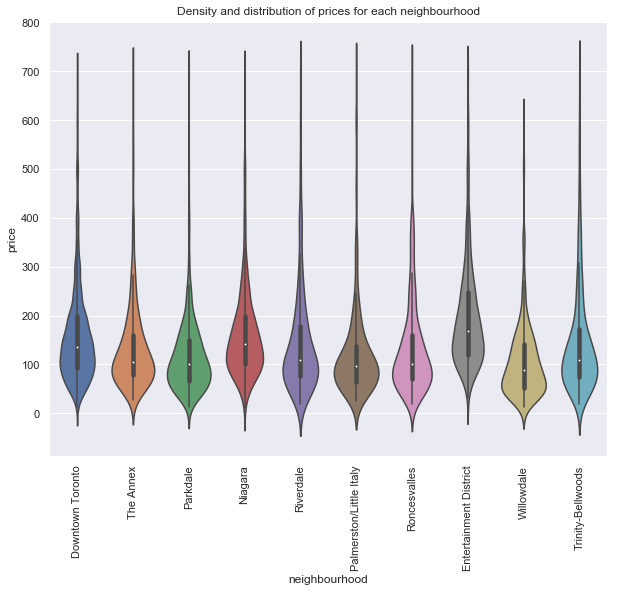

In [22]:
sns.set(rc={'figure.figsize':(10,8)})

df_less_price = data.loc[data['price']<=700]
top_10_nb = data.neighbourhood.value_counts().head(10).index.tolist()
df_top_10_nb = df_less_price.loc[data['neighbourhood'].isin(top_10_nb)]

viz_4 = sns.violinplot(data = df_top_10_nb, x='neighbourhood', y ='price')
viz_4.set_title('Density and distribution of prices for each neighbourhood')
viz_4.set_xticklabels(viz_4.get_xticklabels(), rotation = 90)



If we dont use the number of data points to scale each of the neighbourhoods, we can see that the Entretainment district has the highest average of price per night, but DT and Niagara are really close. This makes sense as these would be the top 3 areas of tourism.

Willwdale appears to be the cheapest option, with its mean leaning toward less than $100 per night.

Now, let's scale this using the number of data points per neighbourhood.

[Text(0,0,'Downtown Toronto'),
 Text(0,0,'The Annex'),
 Text(0,0,'Parkdale'),
 Text(0,0,'Niagara'),
 Text(0,0,'Riverdale'),
 Text(0,0,'Palmerston/Little Italy'),
 Text(0,0,'Roncesvalles'),
 Text(0,0,'Entertainment District'),
 Text(0,0,'Willowdale'),
 Text(0,0,'Trinity-Bellwoods')]

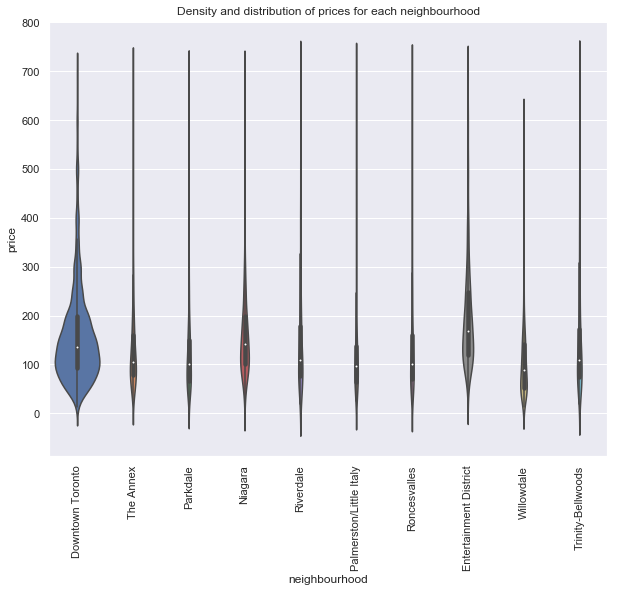

In [27]:
df_less_price = data.loc[data['price']<=700]
top_10_nb = data.neighbourhood.value_counts().head(10).index.tolist()
df_top_10_nb = df_less_price.loc[data['neighbourhood'].isin(top_10_nb)]

viz_5 = sns.violinplot(data = df_top_10_nb, x='neighbourhood', y ='price', scale = 'count')
viz_5.set_title('Density and distribution of prices for each neighbourhood')
viz_5.set_xticklabels(viz_4.get_xticklabels(), rotation = 90)



Now we can see that most of the listings are in DT, Niagara and Ed. Once again, this might be because of these are hot tourism spots.

Lets get more in detail with the price per negihbourhood, and now let's not remove the outliers.


In [39]:
top_10_nb = data.neighbourhood.value_counts().head(10).index.tolist()
price_list_by_nb=[]
for i in range(len(top_10_nb)):
    sub_df = data.loc[data['neighbourhood']== top_10_nb[i]]
    price_sub_df = sub_df[['price']]
    price_list_by_nb.append(price_sub_df)


#empty list for price distribution
price_list_by_nb_2 = []

# list of unique neighbourhood_group
nb_group_list = top_10_nb

#statistics of price ranges
#for every price of each neighbourhood
for x in price_list_by_nb:
    i = x.describe()
    
    i.reset_index(inplace=True)
    #create a table index/Stats/price
    i.rename(columns={'index':'Stats'}, inplace= True)
    price_list_by_nb_2.append(i)

#rename price to neighbourhood
for i in range(len(nb_group_list)):
    price_list_by_nb_2[i].rename(columns={'price':nb_group_list[i]}, inplace=True)


price_stats_df = price_list_by_nb_2

#setting all df to have Stats as their index, so they all have the same rows
price_stats_df = [df.set_index('Stats') for df in price_stats_df]
price_stats_df = price_stats_df[0].join(price_stats_df[1:])
price_stats_df

,Downtown Toronto,Entertainment District,Niagara,Willowdale,The Annex,Trinity-Bellwoods,Parkdale,Riverdale,Roncesvalles,Palmerston/Little Italy
Stats,,,,,,,,,,
count,4966.000000,1216.000000,959.000000,715.000000,665.000000,504.000000,472.000000,464.000000,377.000000,375.000000
mean,175.943617,215.807566,172.588113,116.763636,169.317293,153.567460,129.264831,154.971983,138.151194,127.506667
std,273.678784,164.447685,139.047304,122.691188,548.125640,132.471909,157.001737,153.824510,116.443238,117.083198
min,13.000000,31.000000,13.000000,13.000000,27.000000,20.000000,13.000000,19.000000,19.000000,25.000000
25%,94.000000,123.000000,100.000000,51.000000,78.000000,75.000000,66.750000,76.000000,71.000000,66.000000
50%,138.000000,174.500000,141.000000,88.000000,109.000000,111.000000,100.000000,110.000000,100.000000,97.000000
75%,200.000000,249.000000,200.000000,141.000000,165.000000,176.000000,150.000000,180.000000,165.000000,140.000000
max,13000.000000,2000.000000,2000.000000,1700.000000,13304.000000,1000.000000,2000.000000,2000.000000,925.000000,1000.000000


Now that we have identified similar neighbours using the violin plot, lets compare similar neighbourhoods with each other in terms of price and how the price varies depending on the room type. 

I am going to be using the data without outliers. Also, I am going to group the top 10 neighbourhoods into three groups: high, medium, and low price.

High= Downtown Toronto, Entretainment Distric, Niagara
Medium = The Annex, Trinity-Bellwoods, RIverdale
Low = Willowdale, Parkdale, Roncesvalles, Palmerston/Little Italy


Text(0.5,0.98,'Distribution of Price for each Room Type per Neighbourhood')

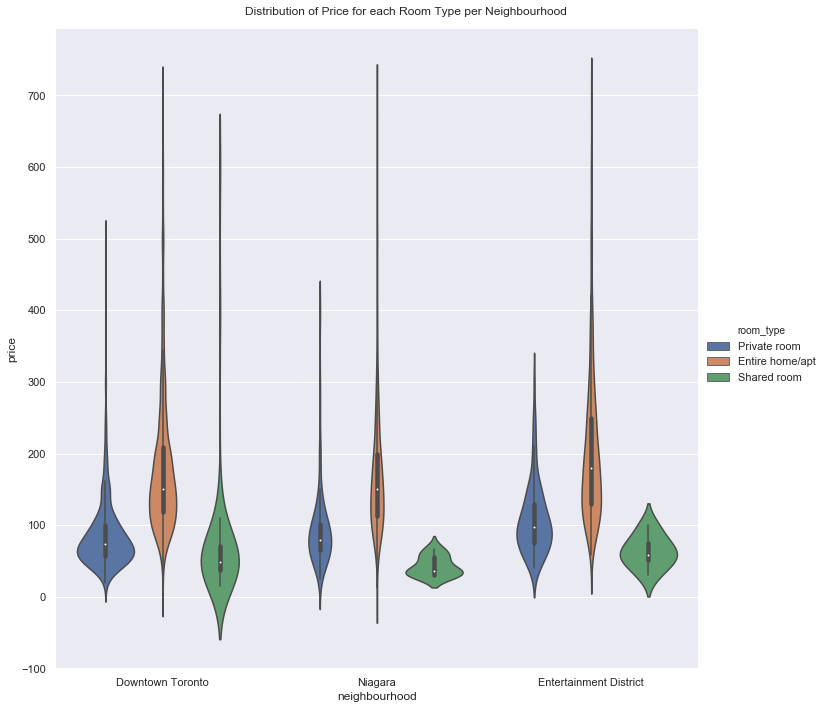

In [34]:
df_less_price = data.loc[data['price']<=700]

high= ['Downtown Toronto', 'Entertainment District', 'Niagara']
medium = ['The Annex', 'Trinity-Bellwoods', 'Riverdale']
low = ['Willowdale', 'Parkdale', 'Roncesvalles', 'Palmerston/Little Italy']

new_df= df_less_price.loc[data['neighbourhood'].isin(high)]



viz_6 = sns.catplot(x = 'neighbourhood', y='price', hue ='room_type',data = new_df, kind= 'violin',height=10)
viz_6.set_xticklabels(rotation= 0)
plt.subplots_adjust(top=0.95)
viz_6.fig.suptitle('Distribution of Price for each Room Type per Neighbourhood') 


- As expected, the cheapest option is a shared beddroom, followed by a private room, followed by an entire home/apt.
- Niagara and the ED have a a concentrated distribution of shared bedrooms (?)
- the ED has the highest average price for an entire home/apt (actually, for every option)
- You will find the cheapest shared rooms in Niagara, and most of them are within the same price range
- You find the most extremes in price when looking at entire homes/apt. This is probably because they joined those two categories and there might be a lot of houses that are being listed on airbnb

Text(0.5,0.98,'Distribution of Price for each Room Type per Neighbourhood')

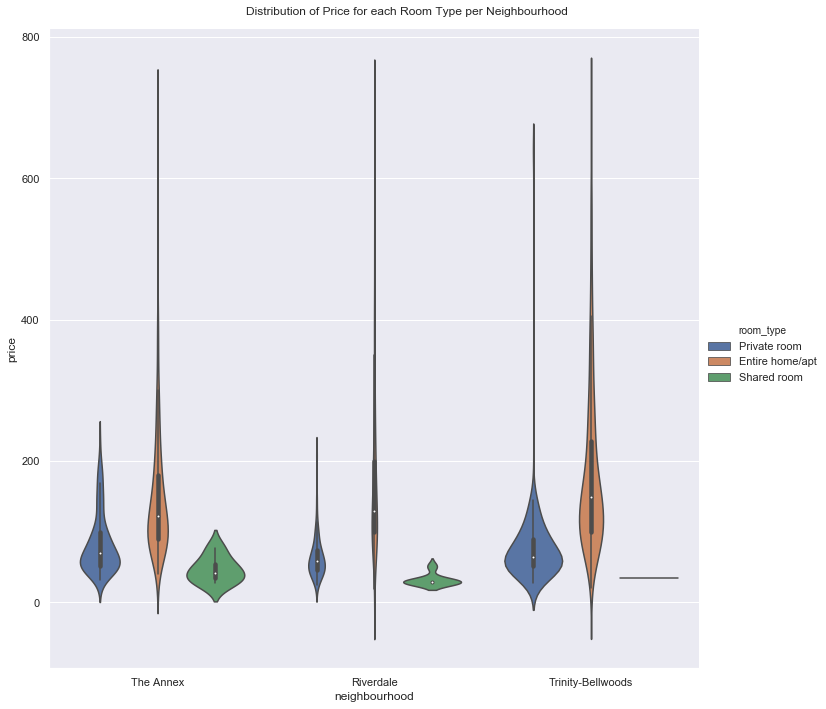

In [37]:
df_less_price = data.loc[data['price']<=700]
new_df= df_less_price.loc[data['neighbourhood'].isin(medium)]



viz_7 = sns.catplot(x = 'neighbourhood', y='price', hue ='room_type',data = new_df, kind= 'violin', height =10)
viz_7.set_xticklabels(rotation= 0)
plt.subplots_adjust(top=0.95)
viz_7.fig.suptitle('Distribution of Price for each Room Type per Neighbourhood') 

- Trinity-Bellwoods only offers ONE shared bedroom!
- Most of the shared rooms in Riverdale are within the same price
- Trinity-Bellwoods has the most expensive entire home/apt
- Private rooms seem to have the same average across the three neighbourhoods, and almost all are skewed to the left meaning that most of their options are on the "cheaper" side

In [83]:
df_1 = data.loc[data['room_type'].isin(['Shared room'])]
df_2 = df_1.loc[data['neighbourhood'].isin(['Trinity-Bellwoods'])]
df_2.head()

,id,name,host_name,host_is_superhost,host_listings_count,neighbourhood,latitude,longitude,property_type,room_type,...,bed_type,price,availability_365,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
15839,31193431,Casa On Queen - A,Anwer,f,4.0,Trinity-Bellwoods,43.64753,-79.40568,Apartment,Shared room,...,Real Bed,34,341,96.0,10.0,10.0,10.0,10.0,10.0,10.0


![alt text](35.png "What a $34 couch looks like in Trinity-Bewllwoods")

Text(0.5,0.98,'Distribution of Price for each Room Type per Neighbourhood')

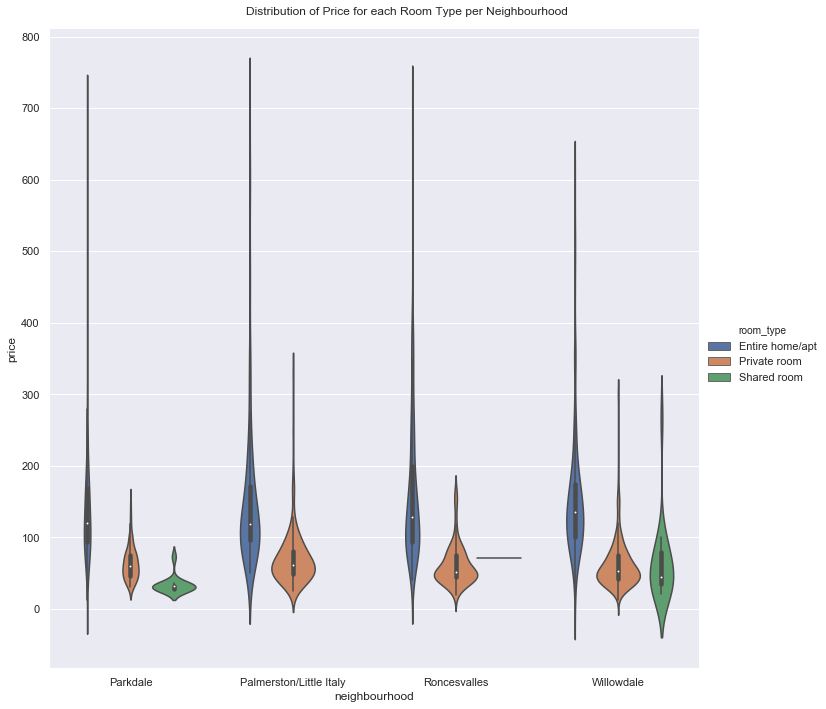

In [38]:
df_less_price = data.loc[data['price']<=700]
new_df= df_less_price.loc[data['neighbourhood'].isin(low)]



viz_7 = sns.catplot(x = 'neighbourhood', y='price', hue ='room_type',data = new_df, kind= 'violin',height=10)
viz_7.set_xticklabels(rotation= 0)
plt.subplots_adjust(top=0.95)
viz_7.fig.suptitle('Distribution of Price for each Room Type per Neighbourhood') 

- Roncesvalles only offers one shared room! AND you can find cheaper private bedrooms...how is that possible?
- Across all four the average price for a private bedroom is very similar
- Willowdale has the highest average for entire home/apt
- Private rooms here range from 0-100, but in the "high" group, private rooms range from 100-200. So you will save money if you stay here and want to have a little privacy

In [86]:
df_1 = data.loc[data['room_type'].isin(['Shared room'])]
df_2 = df_1.loc[data['neighbourhood'].isin(['Roncesvalles'])]
df_2.head()

,id,name,host_name,host_is_superhost,host_listings_count,neighbourhood,latitude,longitude,property_type,room_type,...,bed_type,price,availability_365,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
177,629995,Shared Loft in Queen West- On Couch,Kyle,t,2.0,Roncesvalles,43.64372,-79.43283,Loft,Shared room,...,Couch,71,350,100.0,10.0,10.0,10.0,10.0,10.0,10.0


The only shared room is a $71 couch...but the place where the couch is veeeery nice

![alt text](71.png "What a $71 couch looks like in Roncesvalles")

21617

No handles with labels found to put in legend.


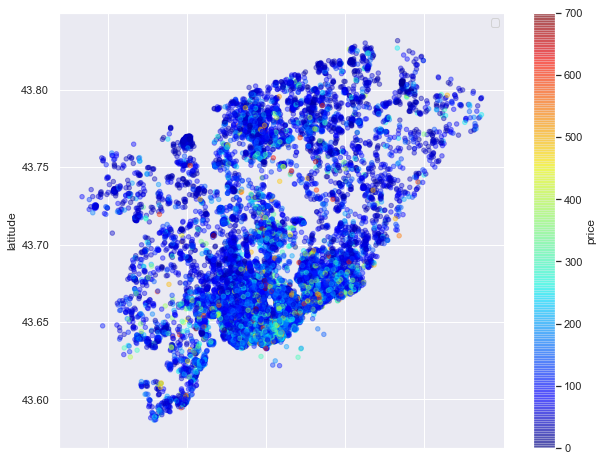

In [44]:
df_less_price = data.loc[data['price']<=700]
viz_8 = df_less_price.plot(kind = 'scatter', x='longitude', y='latitude', c='price', cmap = plt.get_cmap('jet'), colorbar = True, alpha = 0.4, figsize=(10,8))
viz_8.set_xlabel('longitude')
viz_8.legend()

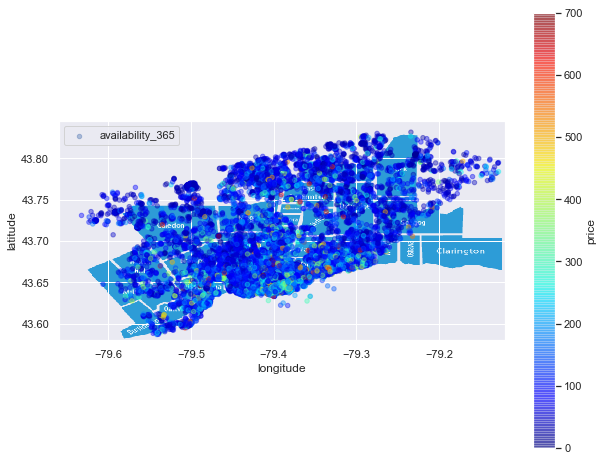

In [41]:
#https://www.kaggle.com/dgomonov/data-exploration-on-nyc-airbnb

import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('http://toronto.nustreamrealty.com/wp-content/uploads/gta-map-legend.png')
to_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(to_img,zorder=0,extent=[-79.63, -79.12, 43.58,43.83])
ax=plt.gca()
#using scatterplot again
df_less_price.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()


        Words  Count
0    downtown   3314
1        room   2848
2     bedroom   2811
3     toronto   2776
4       condo   2711
5     private   2389
6   apartment   1876
7        cozy   1790
8        home   1432
9      luxury   1217
10      suite   1141
11     modern   1107
12   spacious   1092
13    parking   1048
14       west   1042
15      heart   1027
16      house    989
17  beautiful    966
18       near    956
19       view    948
20     subway    923
21     bright    892
22      queen    798
23     studio    781
24         cn    712


[Text(0,0,'downtown'),
 Text(0,0,'room'),
 Text(0,0,'bedroom'),
 Text(0,0,'toronto'),
 Text(0,0,'condo'),
 Text(0,0,'private'),
 Text(0,0,'apartment'),
 Text(0,0,'cozy'),
 Text(0,0,'home'),
 Text(0,0,'luxury'),
 Text(0,0,'suite'),
 Text(0,0,'modern'),
 Text(0,0,'spacious'),
 Text(0,0,'parking'),
 Text(0,0,'west'),
 Text(0,0,'heart'),
 Text(0,0,'house'),
 Text(0,0,'beautiful'),
 Text(0,0,'near'),
 Text(0,0,'view'),
 Text(0,0,'subway'),
 Text(0,0,'bright'),
 Text(0,0,'queen'),
 Text(0,0,'studio'),
 Text(0,0,'cn')]

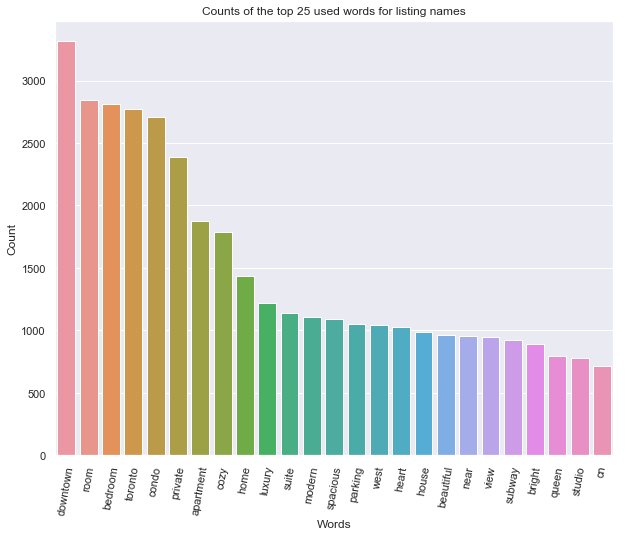

In [59]:
not_desired_words = ['in','the','2','1','and','to','from','for','&','of','a','-','+','with','an']

names = []

for name in data.name:
    names.append(name)

def split_name(name):
    spl = str(name).split()
    return spl

names_for_count =[]

for x in names:
    for word in split_name(x):
        word = word.lower()
        if not (word in not_desired_words):
            names_for_count.append(word)
 
            

#we are going to use counter
from collections import Counter
#let's see top 25 used words by host to name their listing
_top_25_w=Counter(names_for_count).most_common()
_top_25_w=_top_25_w[0:25]

sub_w=pd.DataFrame(_top_25_w)
sub_w.rename(columns={0:'Words', 1:'Count'}, inplace=True)
print(sub_w)

viz_5=sns.barplot(x='Words', y='Count', data= sub_w)
viz_5.set_title('Counts of the top 25 used words for listing names')
viz_5.set_ylabel('Count')
viz_5.set_xlabel('Words')
viz_5.set_xticklabels(viz_5.get_xticklabels(), rotation=80)

[Text(0,0,'Downtown Toronto'),
 Text(0,0,'Entertainment District'),
 Text(0,0,'Niagara'),
 Text(0,0,'Willowdale'),
 Text(0,0,'The Annex'),
 Text(0,0,'Trinity-Bellwoods'),
 Text(0,0,'Parkdale'),
 Text(0,0,'Riverdale'),
 Text(0,0,'Roncesvalles'),
 Text(0,0,'Palmerston/Little Italy')]

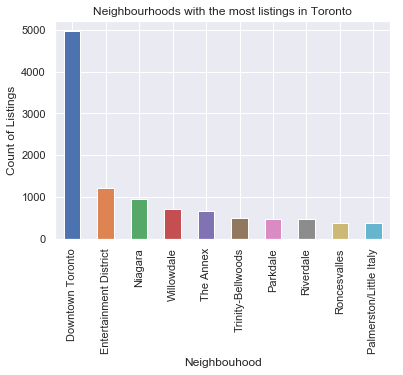

In [19]:
top_10_nb = data.neighbourhood.value_counts().head(10)
top_10_nb

viz_10 = top_10_nb.plot(kind = 'bar')
viz_10.set_title('Neighbourhoods with the most listings in Toronto')
viz_10.set_ylabel('Count of Listings')
viz_10.set_xlabel('Neighbouhood')
viz_10.set_xticklabels(viz_10.get_xticklabels(), rotation = 90)

In [47]:
data.columns

Index(['id', 'name', 'host_name', 'host_is_superhost', 'host_listings_count',
       'neighbourhood', 'latitude', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price',
       'availability_365', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'],
      dtype='object')

Text(0.5,1,'Correlation of Variables')

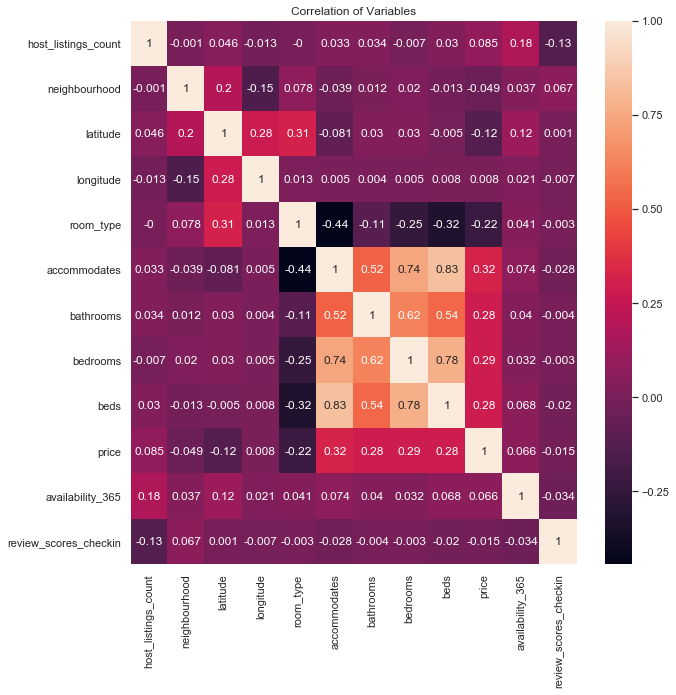

In [55]:
data = pd.read_csv('AB_TO_2019.csv')
data.drop(['id', 'name','host_name','review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness','review_scores_communication','review_scores_location','review_scores_value'], axis=1, inplace=True)

#convert categorical features into numerical ones
data['room_type'] = data['room_type'].astype('category').cat.codes
data['neighbourhood'] = data['neighbourhood'].astype('category').cat.codes

sns.set(rc={'figure.figsize':(10,10)})
viz_11 = sns.heatmap(data.corr().round(3), annot=True)
viz_11.set_title('Correlation of Variables')
